# Matplotlib Scatter Plots Problems

**df.plot(kind='scatter')**

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### Median Yearly Salary vs. Job Count (2.15.1) - Problem


- Create a scatter plot to compare the median yearly salary and the number of jobs based on the **job_title_short** column.
- To create the scatter plot first create a new DataFrame using the **groupby()** method to aggregate and find the median salary and job count for each job title.
- Annotate each point with the job title name.

Hint:

Use the **.plot()** method of the grouped DataFrame to create the scatter plot and **plt.text()** for labeling each point.

In [ ]:
# Group data by job title and calculate average yearly salary and job count
job_title_stats = df.groupby('job_title_short').agg(
   median_salary_year_avg=('salary_year_avg', 'median'),
   job_count=('job_title_short', 'count')
).dropna()

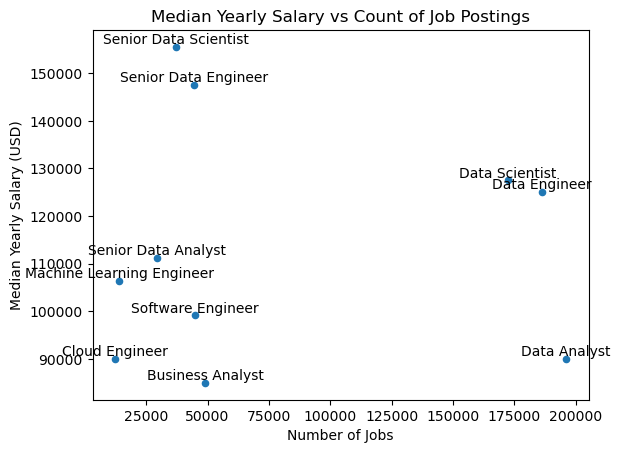

In [41]:
# Plotting the results
job_title_stats.plot(kind='scatter', x='job_count', y='median_salary_year_avg')
plt.xlabel('Number of Jobs')
plt.ylabel('Median Yearly Salary (USD)')
plt.title('Median Yearly Salary vs Count of Job Postings')

# Adding job title labels to each point
for i in range(len(job_title_stats)):
   job_count = job_title_stats['job_count'].iloc[i]
   mean_salary = job_title_stats['median_salary_year_avg'].iloc[i]
   job_title = job_title_stats.index[i]
   plt.text(job_count, mean_salary, job_title, ha='center', va='bottom')

plt.show()

### Top 7 Countries by Median Yearly Salary vs Job Count (2.15.2) - Problem

Create a scatter plot to visualize the relationship between the number of job postings and median yearly salary for the top 7 countries based on highest number of job postings. Annotate each point with the country's name.

Hint:

Use the **.plot()** method of the grouped DataFrame to create the scatter plot, and the **plt.text()** function to add annotations for each data point.

In [37]:
country_stats = df.groupby('job_country').agg(
    median_salary=('salary_year_avg', 'median'),
    job_count=('job_title_short', 'count')
)

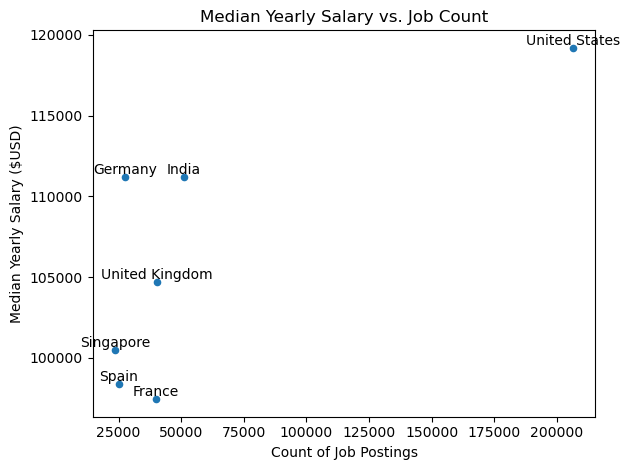

In [40]:
country_stats = country_stats.sort_values(by='job_count', ascending=False).head(7)
7
country_stats.plot(kind='scatter',x='job_count', y='median_salary')

for i, txt in enumerate(country_stats.index):
    plt.text(country_stats['job_count'].iloc[i], country_stats['median_salary'].iloc[i], txt, ha='center', va='bottom')

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Median Yearly Salary vs. Job Count')
plt.tight_layout()

plt.show()

### Average Yearly Salary vs. Job Count for Top Roles by Schedule Type (2.15.3) - Problem


- Create a scatter plot to visualize the relationship between the average yearly salary and the job count filtering a DataFrame for:
    - Data Analyst, Data Scientist, and Data Engineer positions in **job_title_short**
    - United States for the **job_country**
    - 'Full-time' and 'Contractor' for the **job_schedule_type**
    - Remove roles that do not have any yearly salary data.
- Combine the **job_title_short** and **job_schedule_type** into one column (called **job_title_type**) in the newly created DataFrame to use as the labels for the plot.
- For the plot use a **for** loop to cycle through the unique values in **job_title_type** and plot using the **plt.scatter()** function, specifying the label of **job_title_type**.
- Ensure the legend is appearing.
- Label the plot's axis and title appropriately.


Code Needed:

`target_job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']`

Hint:

Use the **plt.scatter()** function to generate the scatter plot, employing the **label** parameter to differentiate between the different job titles and job types.

In [49]:
# Define specific job titles to include
target_job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

# Filter US jobs for only full-time and part-time roles and specific job titles, then drop rows with missing salary data
us_jobs_df = df[
   (df['job_country'] == 'United States') &
   (df['job_schedule_type'].isin(['Full-time', 'Contractor'])) &
   (df['job_title_short'].isin(target_job_titles))
].dropna(subset=['salary_year_avg']).copy()


In [50]:
# Group by job schedule type and job title, calculate mean yearly salary and job count
stats = us_jobs_df.groupby(['job_schedule_type', 'job_title_short']).agg(
   mean_salary_year_avg=('salary_year_avg', 'mean'),
   job_count=('job_title_short', 'count')
).dropna()

# Reset the index to make plotting easier
stats.reset_index(inplace=True)

# Combine title and type into one value for labels
stats['job_title_type'] = stats['job_title_short'] + ' - ' + stats['job_schedule_type']


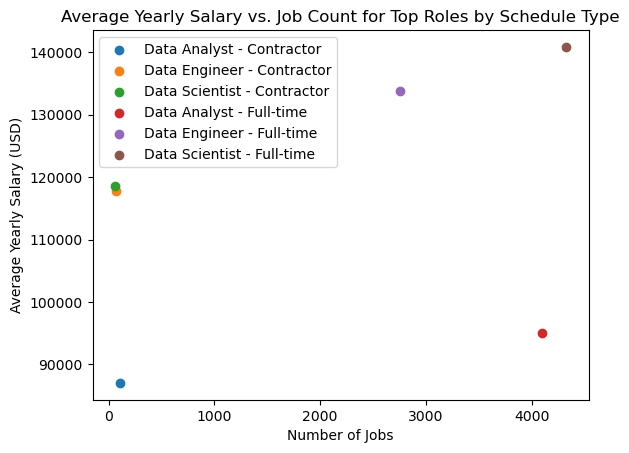

In [51]:
# Plot using plt.scatter()
for job_title_type in stats['job_title_type'].unique():
   subset = stats[stats['job_title_type'] == job_title_type]
   plt.scatter(subset['job_count'], subset['mean_salary_year_avg'], label=job_title_type)

plt.xlabel('Number of Jobs')
plt.ylabel('Average Yearly Salary (USD)')
plt.title('Average Yearly Salary vs. Job Count for Top Roles by Schedule Type')
plt.legend()
plt.show()